In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [11]:
# Membaca dataset dengan pengecekan encoding
df = pd.read_csv('data/origin-data/google-play-rev-gen-2.csv', encoding='utf-8')

# Memeriksa beberapa baris pertama
df.head(10)

,id,title,avatar,rating,snippet,likes,date,iso_date,response
0,e5384431-56f9-43fa-a32a-53296afc7f66,Seraphim,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,"While I've reviewed this before, I decided to ...",88,"October 09, 2024",2024-10-09T00:08:20Z,NaN
1,6a73081f-3490-47ba-89fa-83744cb20940,TWOSTORE !,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,Very fun but I wish there was more fighting in...,35,"October 12, 2024",2024-10-12T06:39:01Z,NaN
2,3a3d4c90-0b6e-45dc-b1e6-014659055bbf,A G,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,"Fun game, I enjoy the story. There is tons to ...",11,"October 30, 2024",2024-10-30T18:01:37Z,NaN
3,99015538-1d26-4bd9-a02f-37bc2a361d1a,Astra,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,This game is phenomenal. The art style and sce...,77,"October 18, 2024",2024-10-18T19:11:12Z,NaN
4,541b3b4d-97f6-42e0-9c68-059a63e1e67f,Angela Williams,https://play-lh.googleusercontent.com/a-/ALV-U...,2.0,"I love this game. However, it is incredibly la...",14,"October 14, 2024",2024-10-14T03:04:43Z,NaN
5,ad484b6a-1b9c-42ab-9cee-9df6e28f12d4,Valerie,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,I used to be obsessed with this game but I hav...,99,"October 13, 2024",2024-10-13T14:02:08Z,NaN
6,fb25cdf6-40d8-44e8-b1b9-d439ebd88565,Daniel “Chotara” Ricciardi,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,Highly recommend. I have been playing the game...,65,"October 18, 2024",2024-10-18T15:20:11Z,NaN
7,36e821d3-9441-4eaa-94a7-9c7b9b7463b5,Amy,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,Hello! I absolutely love this game! It has inc...,29,"October 29, 2024",2024-10-29T00:27:08Z,NaN
8,4b1e6dcb-d251-450e-9be6-358b4bb8e9d6,Feitan Desy,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,I've been playing this game since January 16th...,64,"October 08, 2024",2024-10-08T23:13:09Z,NaN
9,27525772-1c0a-40e4-8321-4c5f0a0f7c64,Olivia Staringer,https://play-lh.googleusercontent.com/a-/ALV-U...,1.0,"Uninteresting characters, uninteresting dialog...",14,"November 11, 2024",2024-11-11T22:58:07Z,NaN


In [12]:
print(df.columns)

Index(['id', 'title', 'avatar', 'rating', 'snippet', 'likes', 'date',
       'iso_date', 'response'],
      dtype='object')


In [13]:
# import pandas as pd
import os

# Reading the dataset with encoding check
df = pd.read_csv('data/origin-data/google-play-rev-gen-2.csv', encoding='utf-8')

# Define the function to classify ratings
def classify_rating(rating):
    if rating in [3, 4, 5]:
        return 'positive'
    elif rating in [1, 2]:
        return 'negative'
    # elif rating == 3:
    #     return 'neutral'
    return 'unknown'

# Apply the classification function to create the 'rating_label' column
df['rating_label'] = df['rating'].apply(classify_rating)

# Create the 'new-changedData' directory if it doesn't exist
output_directory = 'data/new-changedData'
os.makedirs(output_directory, exist_ok=True)

# Define the output file path
output_file_path = os.path.join(output_directory, 'google-play-rev-gen-2-with-rating-label.csv')

# Save the updated DataFrame to the new CSV file inside the directory
df.to_csv(output_file_path, index=False)

# Print the first few rows to check the result
print(df[['rating', 'rating_label']].head(10))

# Confirm the file has been saved
print(f"File saved to: {output_file_path}")


   rating rating_label
0     3.0     positive
1     3.0     positive
2     3.0     positive
3     5.0     positive
4     2.0     negative
5     3.0     positive
6     5.0     positive
7     4.0     positive
8     4.0     positive
9     1.0     negative
File saved to: data/new-changedData/google-play-rev-gen-2-with-rating-label.csv


In [14]:
# Calculate the total number of data points
total_data_count = len(df)

# Calculate the number of data per 'rating_label'
rating_label_counts = df['rating_label'].value_counts()

# Display the total number of data points and the counts per 'rating_label'
print(f"Total data: {total_data_count}")
print("\nAmount of rating data rating_label:")
print(rating_label_counts)

# Calculate the number of data based on the original rating values
rating_counts = df['rating'].value_counts()

# Display the counts based on rating
print("\ntotal data based on rating:")
print(rating_counts)

Total data: 199

Amount of rating data rating_label:
rating_label
positive    155
negative     44
Name: count, dtype: int64

total data based on rating:
rating
5.0    80
4.0    42
3.0    33
1.0    23
2.0    21
Name: count, dtype: int64


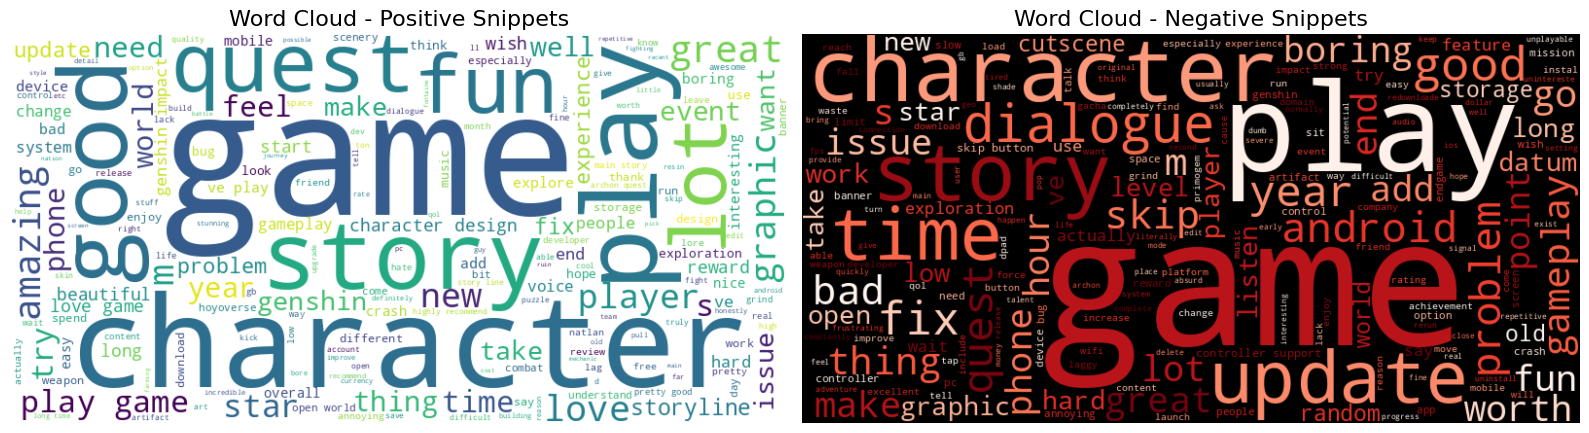

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('data/new-changedData/google-play-rev-gen-2-with-rating-label-clean-text.csv', encoding='utf-8')

# Filter positive and negative snippets
positive_snippets = df[df['rating_label'] == 'positive']['cleaned_snippet']
negative_snippets = df[df['rating_label'] == 'negative']['cleaned_snippet']

# Combine all positive and negative snippets into single strings
positive_text = " ".join(positive_snippets.dropna())
negative_text = " ".join(negative_snippets.dropna())

# Generate word clouds for positive and negative snippets
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Create a subplot for word clouds
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Word Cloud - Positive Snippets', fontsize=16)
ax[0].axis('off')

ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Word Cloud - Negative Snippets', fontsize=16)
ax[1].axis('off')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import spacy
import re

# Load spaCy model (make sure to download the model first using: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

# Function to clean text using spaCy (lemmatization, remove stop words, punctuation, numbers, emojis, etc.)
def clean_text_spacy(text):
    # Normalize text: lowercase, remove special characters, emojis, and lemmatize
    text = text.lower()  # Convert to lowercase
    
    # Remove emojis using a regex pattern
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric shapes
        "\U0001F800-\U0001F8FF"  # Supplemental arrows
        "\U0001F900-\U0001F9FF"  # Supplemental symbols
        "\U0001FA00-\U0001FA6F"  # Chess symbols
        "\U0001FA70-\U0001FAFF"  # Symbols & pictographs extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed characters
        "]+",
        flags=re.UNICODE,
    )
    text = emoji_pattern.sub(r'', text)  # Remove emojis
    
    # Remove other unwanted characters (symbols, punctuation, numbers)
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    
    # Process the cleaned text with spaCy
    doc = nlp(text)
    
    # Remove stop words, punctuation, and keep only lemmatized tokens
    tokens = [
        token.lemma_ 
        for token in doc 
        if not token.is_stop and token.is_alpha
    ]
    return ' '.join(tokens)

# Load the dataset
df = pd.read_csv('data/new-changedData/google-play-rev-gen-2-with-rating-label.csv', encoding='utf-8')

# Remove duplicate reviews based on the 'snippet' column
df = df.drop_duplicates(subset='snippet')

# Clean the 'snippet' column and add a new 'cleaned_snippet' column
df['cleaned_snippet'] = df['snippet'].fillna('').apply(clean_text_spacy)

# Remove the original 'snippet' column and other unnecessary columns
df = df.drop(columns=['snippet', 'id', 'title', 'avatar', 'date', 'iso_date'])

# Display the first few rows to check the cleaned snippets
print("Cleaned snippets:")
print(df[['cleaned_snippet']].head(10))

# Save the cleaned data to a new CSV file
output_file = 'data/new-changedData/google-play-rev-gen-2-with-rating-label-clean-text.csv'
df.to_csv(output_file, index=False)

# Confirm the file has been saved
print(f"Cleaned data saved to: {output_file}")

Cleaned snippets:
                                     cleaned_snippet
0  ve review decide edit response current opinion...
1  fun wish fighting quest bunch talk run come qu...
2  fun game enjoy story ton ton content clear bor...
3  game phenomenal art style scenery stunning yes...
4  love game incredibly laggy point unplayable gr...
5  obsess game not play month boring repetitive g...
6  highly recommend play game year impressed mech...
7  hello absolutely love game incredible graphic ...
8  ve play game january th real complaint style n...
9  unintereste character unintereste dialog story...
Cleaned data saved to: data/new-changedData/google-play-rev-gen-2-with-rating-label-clean-text.csv


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler  # Import the scaler
from textblob import TextBlob
import pandas as pd

# Load the cleaned data
df = pd.read_csv('data/new-changedData/google-play-rev-gen-2-with-rating-label-clean-text.csv', encoding='utf-8')

# Add review length as a feature
df['review_length'] = df['cleaned_snippet'].apply(len)

# Add sentiment polarity score as a feature
df['sentiment_score'] = df['cleaned_snippet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# TF-IDF vectorization with refined settings
tfidf = TfidfVectorizer(max_features=5000, max_df=0.5, min_df=0.01, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_snippet']).toarray()

# Combine TF-IDF features with additional features
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())

# Scale the additional features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['review_length', 'sentiment_score']])
scaled_features_df = pd.DataFrame(scaled_features, columns=['review_length', 'sentiment_score'])

# Combine scaled additional features with TF-IDF features
X = pd.concat([tfidf_df, scaled_features_df], axis=1)

y = df['rating_label']

# Save the new DataFrame with TF-IDF and additional features
df_tfidf = pd.concat([df[['rating_label']], X], axis=1)
df_tfidf.to_csv('data/new-changedData/google-play-rev-gen-2-TF_IDF-enhanced.csv', index=False)

# Print results
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print("\nFirst 10 rows of the new data with enhanced features:")
print(df_tfidf.head(10))

Feature matrix shape: (199, 630)
Target variable shape: (199,)

First 10 rows of the new data with enhanced features:
  rating_label   ability      able  absolutely  absurd  abyss  accommodate  \
0     positive  0.000000  0.000000     0.00000     0.0    0.0          0.0   
1     positive  0.236854  0.000000     0.00000     0.0    0.0          0.0   
2     positive  0.000000  0.212555     0.00000     0.0    0.0          0.0   
3     positive  0.000000  0.000000     0.00000     0.0    0.0          0.0   
4     negative  0.000000  0.000000     0.00000     0.0    0.0          0.0   
5     positive  0.000000  0.000000     0.00000     0.0    0.0          0.0   
6     positive  0.000000  0.000000     0.21917     0.0    0.0          0.0   
7     positive  0.000000  0.000000     0.21300     0.0    0.0          0.0   
8     positive  0.000000  0.000000     0.00000     0.0    0.0          0.0   
9     negative  0.000000  0.000000     0.00000     0.0    0.0          0.0   

   account  achievement

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import ADASYN
from collections import Counter

# Load the dataset with TF-IDF features
df_tfidf = pd.read_csv('data/new-changedData/google-play-rev-gen-2-TF_IDF-enhanced.csv', encoding='utf-8')

# Extract the feature matrix (X) and target variable (y)
X = df_tfidf.drop(columns=['rating_label'])  # Drop the 'rating_label' column to get the features
y = df_tfidf['rating_label']  # Target variable is the 'rating_label'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y_train))

# Initialize ADASYN
adasyn = ADASYN(random_state=42, n_neighbors=5)  # `n_neighbors` can be adjusted based on your dataset

# Apply ADASYN to the training data
try:
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
except ValueError as e:
    print(f"Error during ADASYN resampling: {e}")
    exit()

# Check class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_train_adasyn))

# Display the shape of the new oversampled training set
print(f"Shape of X_train_adasyn: {X_train_adasyn.shape}")
print(f"Shape of y_train_adasyn: {y_train_adasyn.shape}")

Class distribution before ADASYN: Counter({'positive': 124, 'negative': 35})
Class distribution after ADASYN: Counter({'positive': 124, 'negative': 123})
Shape of X_train_adasyn: (247, 630)
Shape of y_train_adasyn: (247,)


In [19]:
# Train an SVM model
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced', random_state=42)
svm_model.fit(X_train_adasyn, y_train_adasyn)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.8250
F1-Score (Weighted): 0.8282

Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.67      0.63         9
    positive       0.90      0.87      0.89        31

    accuracy                           0.82        40
   macro avg       0.75      0.77      0.76        40
weighted avg       0.83      0.82      0.83        40


Confusion Matrix:
[[ 6  3]
 [ 4 27]]
